# Example 2: Hospital Charges for Inpatients in the U.S.

In this example we will be exploring a dataset provided by kaggle.com about hospital charges for inpatiens across a variety of providers in the U.S. The data and some accompanying information can be found on kaggle here:

https://www.kaggle.com/speedoheck/inpatient-hospital-charges


## Data Combining

In Example 1 we saw an introduction to data science in Python, with a walkthrough using some of the most commonly applied functionality. As an avid user of R also, I included a porting the "5 verbs of dplyr" to Python in the pandas:

* arrange: sort or order a data frame
* select: subset your dataset down to particular columns/variables of interest
* filter: subset your dataset down to particular rows/observations of interest
* mutate: create and append new variables/columns to your dataset
* summarize: compute aggregations, statistics, or other summaries of the data

with the obligatory inclusion of being able to "group by." Besides the parallel with dplyr functionality in R, these operations also constitute the core of most SQL queries. So, to say they are foundational is still probably an understatement!

In this example we're going to combine the dataset from Example with the hospital charges dataset linked above. Then, we're going to look at some basic visualiations using the matplotlib library.

### Reading the Data In

In [63]:
import pandas as pd
import numpy as np

energy = pd.read_csv("Energy Census and Economic Data US 2010-2014.csv")
hospital = pd.read_csv("inpatientCharges.csv")

In [64]:
energy.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


In [65]:
hospital.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,"$32,963.07","$5,777.24","$4,763.73"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,"$15,131.85","$5,787.57","$4,976.71"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,"$37,560.37","$5,434.95","$4,453.79"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,"$13,998.28","$5,417.56","$4,129.16"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,"$31,633.27","$5,658.33","$4,851.44"


### Combining These Two Datasets

Notice that these two datasets actually only have the state code in common, so we'll want to merge on that. The pandas library offers syntax and functionality very similar to SQL joins: left, right, inner, and outer. The entry point for all of these is with the merge() function, but there are more specific ways of performing joins if you take a deeper look at the pandas documentation.

In [66]:
alldata = pd.merge(energy, hospital, left_on = "StateCodes", right_on = "Provider State", how = "inner")

In [67]:
alldata.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,"$32,963.07","$5,777.24","$4,763.73"
1,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,"$15,131.85","$5,787.57","$4,976.71"
2,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,"$37,560.37","$5,434.95","$4,453.79"
3,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,"$13,998.28","$5,417.56","$4,129.16"
4,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,"$31,633.27","$5,658.33","$4,851.44"


### Cleaning the Hospital Charges

Notice that the hospital charge variables are actually character as they include the dollar signs. Let's remove those and convert the variables to numeric for better use.

In [68]:
alldata["Average Covered Charges"].head()
# alldata["Average Covered Charges"] = pd.to_numeric(alldata["Average Covered Charges"].str.replace("\\$|,", ""))
# alldata["Average Covered Charges"].head()

# alldata["Average Total Payments"] = pd.to_numeric(alldata["Average Total Payments"].str.replace("\\$|,", ""))
# alldata["Average Medicare Payments"] = pd.to_numeric(alldata["Average Medicare Payments"].str.replace("\\$|,", ""))

# alldata.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


## Some Basic Visualizations

In [71]:
import matplotlib.pyplot as plt

AttributeError: 'Rectangle' object has no property 'num_bins'

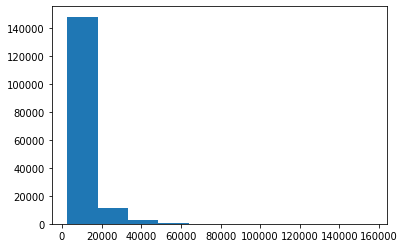

In [72]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(alldata["Average Total Payments"], num_bins = 50)